# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [12]:
import os 
print(os.getcwd())
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())


c:\Users\magda\OneDrive\Escritorio\MDS_licitalab
c:\Users\magda\OneDrive\Escritorio


In [13]:
import os
from src.utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode  
import torch 
from sklearn.cluster import KMeans, AgglomerativeClustering 
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    # Set the GPU device (assuming you have at least one GPU)
    gpu_device = 0  # You can change this to the index of the GPU you want to use
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    # If no GPU is available, use the CPU
    device = torch.device("cpu")
    print("No GPU available, using CPU")


Using GPU: NVIDIA GeForce RTX 3060


Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [14]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

Carga el Dataset.

In [15]:
train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())


<class 'pandas.core.frame.DataFrame'>


C:\Users\magda\AppData\Local\Temp\ipykernel_1596\3627091223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


,qualifying users
taxnumberprovider,
77.577.609-9,10
77.539.459-5,10
77.497.601-9,10
77.539.417-K,10
77.512.285-4,10
...,...
77.730.550-6,1610
91.575.000-1,1654
96.556.940-5,2114


,taxnumberprovider,qualifying users
0,77.577.609-9,10
1,77.539.459-5,10
2,77.497.601-9,10
3,77.539.417-K,10
4,77.512.285-4,10
...,...,...
1841,77.730.550-6,1610
1842,91.575.000-1,1654
1843,96.556.940-5,2114
1844,77.765.630-9,2558


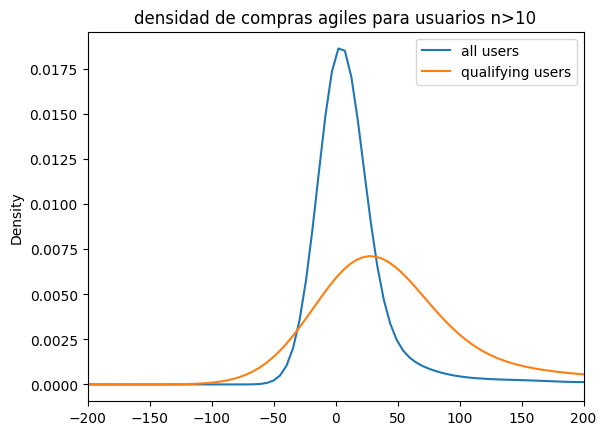

In [16]:
gb = train.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

print(type(qualifying_users))
display(qualifying_users)
df = qualifying_users.reset_index()
display(df)

C:\Users\magda\AppData\Local\Temp\ipykernel_1596\4117253357.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


(-200.0, 200.0)

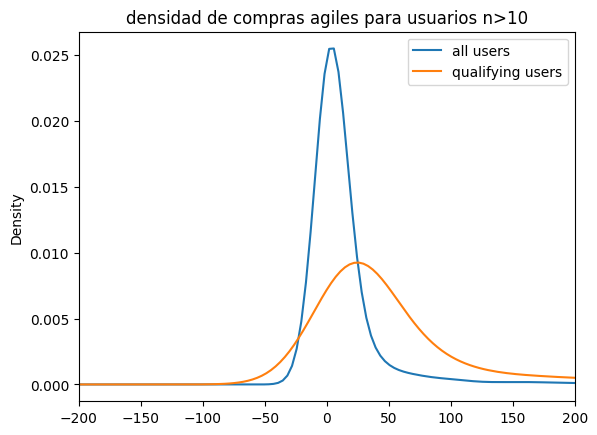

In [17]:
gb = test.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

Lanzar el recomendador. Si no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

In [18]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd())

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\userspace_data' created or already exists.
['BERT_model.pkl', 'BERT_tokenizer.pkl', 'clustering_model.pkl', 'clusters.csv', 'corpus.csv', 'vectorized_corpus.csv']
All necesary files have been found.
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Loaded corpus data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Se han removido 75.15% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1378.


In [19]:
RS.plot_clusters()

testing clusters in elbow method: 100%|██████████| 40/40 [00:21<00:00,  1.88user/s]


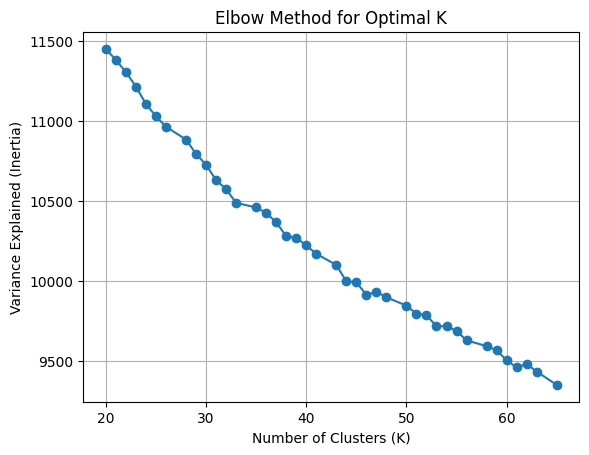

Optimal n_clusters is 44
Used AgglomerativeClustering() to clusterize.

Silhouette Scores:
Agglomerative Clustering: 0.3095423


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


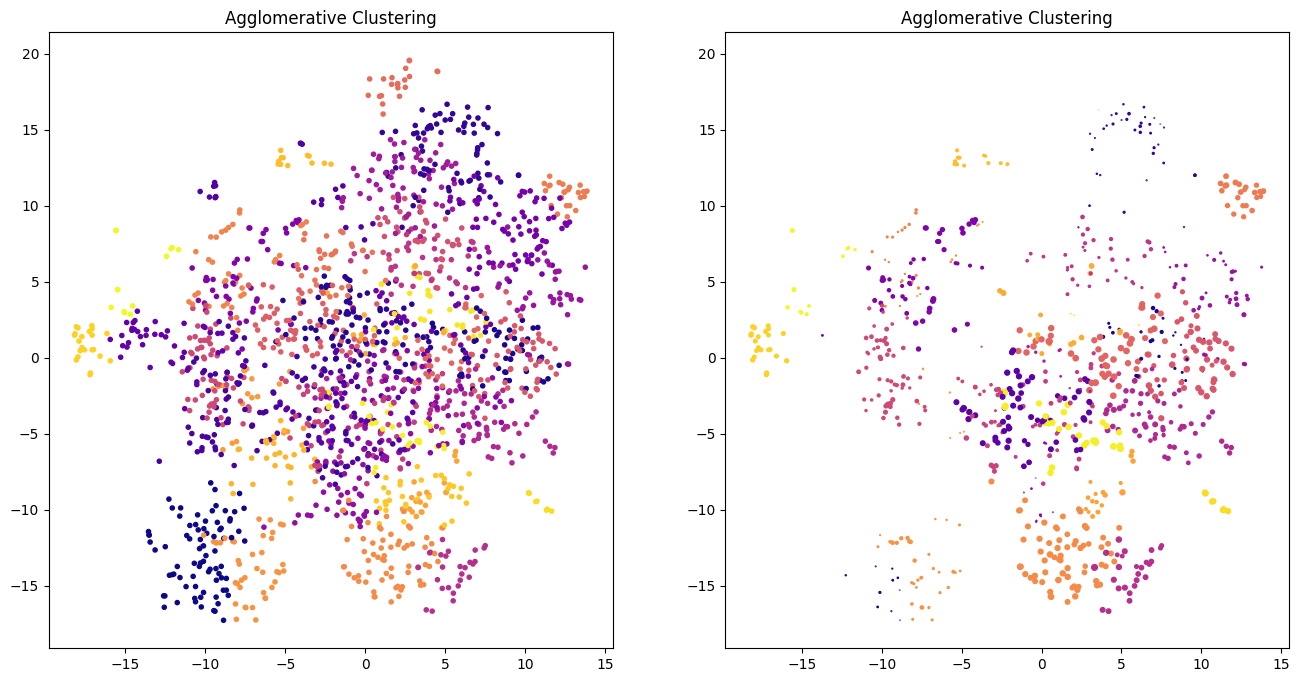

Exporting cluster model
Exporting clusters


In [20]:
import numpy as np
RS.regenerate_clustering(AgglomerativeClustering(),
                         np.linspace(20,65,40,dtype = int))

### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [21]:
ruts = test['taxnumberprovider'].sample(n =1) 
n_cluster,gg = RS.predict(ruts.values[0])

(77.730.550-6) data point belongs to cluster 0


### Métricas

In [22]:
RS.evaluate_users()

Processing RUTs: 100%|██████████| 1240/1240 [05:26<00:00,  3.79it/s]


In [23]:
#display(RS.a)
#display(RS.b)
#display(RS.c)
display(RS.d)

{'self_precision_porcentual_global': 0.13266267614412255,
 'self_recall_porcentual_global': 5.894274320610787,
 'self_f1_score_porcentual_global': 0.24770500829852715,
 'total_participaciones_todos': 189020,
 'total_licitaciones_calzadas': 13574,
 'ratio_par_calz': 0.07181250661305683}